In [1]:
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

import numpy as np
import matplotlib.pyplot as plt

fatal: destination path 'data-ch20' already exists and is not an empty directory.
Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Epoch 1/100
32/32 [==============================] - 7s 200ms/step - loss: 0.7035 - accuracy: 0.4812 - val_loss: 0.6857 - val_accuracy: 0.5600
Epoch 2/100
32/32 [==============================] - 6s 195ms/step - loss: 0.6975 - accuracy: 0.4563 - val_loss: 0.6875 - val_accuracy: 0.5200
Epoch 3/100
32/32 [==============================] - 6s 193ms/step - loss: 0.6821 - accuracy: 0.6062 - val_loss: 0.6825 - val_accuracy: 0.7400
Epoch 4/100
32/32 [==============================] - 6s 196ms/step - loss: 0.6811 - accuracy: 0.5625 - val_loss: 0.6615 - val_accuracy: 0.5600
Epoch 5/100
32/32 [==============================] - 6s 197ms/step - loss: 0.6568 - accuracy: 0.6187 - val_loss: 0.6397 - val_accuracy: 0.7200
Epoch 6/100
32/32 [==============================] - 6s 196ms/step - loss: 0.6477 - accuracy: 0.6250 - val_loss: 0.6922 -

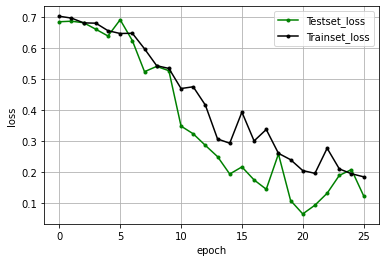

In [9]:
# 깃허브에 준비된 데이터를 불러오기.
!git clone https://github.com/taehojo/data-ch20.git

# 학습셋의 변형 설정.
train_datagen= ImageDataGenerator(rescale= 1./255, # RGB 0~255임으로, 255로 나누어 0~1값으로 구분
                                  horizontal_flip= True, # 좌, 우 반전
                                  width_shift_range= .1, # 전체 크기의 15% 범위에서 좌, 우로 이동
                                  height_shift_range= .1, # 위와 같은 범위에서 위, 아래로 이동.
                                  #rotation_range= 5, 정해진 각도만큼 회전
                                  #shear_range= .7, 죄표 하나를 고정하고 나머지를 이동
                                  #zoom_range= [0.9, 2.2], 확대 또는 축소
                                  #vertical_flip= True, 상, 하 반전
                                  #fill_mode= 'nearest' 빈 공간을 채우는 방법으로 'nearest'는 가장 비슷한 색으로로
                                  )

# 학습셋이 있는 폴더의 위치 지정.
train_generator= train_datagen.flow_from_directory(
    './data-ch20/train',
    target_size= (150, 150),
    batch_size= 5,
    class_mode= 'binary')

# 테스트셋은 이미지 부풀리기 과정 X.
test_datagen= ImageDataGenerator(rescale= 1./255)

# 테스트셋이 있는 폴더의 위치 지정.
test_generator= test_datagen.flow_from_directory(
    './data-ch20/test',
    target_size= (150, 150),
    batch_size= 5,
    class_mode= 'binary')

# 앞서 배운 CNN 모델을 만들어 적용.
model= Sequential()
model.add(Conv2D(32, (3, 3), input_shape= (150, 150, 3))) # (150 ,150 ,3) = 픽셀의 크기(150, 150)에 이미지의 색인 색상이기에 3(흑백이면 1)
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size= (2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size= (2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size= (2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# 모델 실행의 옵션 설정.
model.compile(loss= 'binary_crossentropy', optimizer= optimizers.Adam(
    learning_rate= 0.0002), metrics= ['accuracy'])

# 학습의 조기 중단 설정.
early_stopping_callback= EarlyStopping(monitor= 'val_loss', patience= 5)

# 모델 실행.
history= model.fit(train_generator, epochs= 100, validation_data= test_generator,
                   validation_steps= 10, callbacks= [early_stopping_callback])

# 검증셋과 학습셋의 오차 저장.
y_vloss= history.history['val_loss']
y_loss= history.history['loss']

# 그래프 표현.
x_len= np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker= '.', c= 'green', label= 'Testset_loss')
plt.plot(x_len, y_loss, marker= '.', c= 'black', label= 'Trainset_loss')

# 그래프에 그리드 추가, 레이블 표시.
plt.legend(loc= 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

모델 성능 극대화하기

In [12]:
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout
from tensorflow.keras import Input, models, layers, optimizers, metrics
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import VGG16

import numpy as np
import matplotlib.pyplot as plt

fatal: destination path 'data-ch20' already exists and is not an empty directory.
Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_8 (Flatten)         (None, 8192)              0         
                                                                 
 dense_16 (Dense)            (None, 64)                524352    
                                                                 
 activation_38 (Activation)  (None, 64)                0         
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_17 (Dense)     

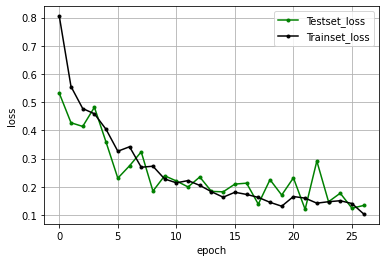

In [14]:
# 깃허브에 준비된 데이터를 불러오기.
!git clone https://github.com/taehojo/data-ch20.git

# 학습셋의 변형 설정.
train_datagen= ImageDataGenerator(rescale= 1./255, # RGB 0~255임으로, 255로 나누어 0~1값으로 구분
                                  horizontal_flip= True, # 좌, 우 반전
                                  width_shift_range= .1, # 전체 크기의 15% 범위에서 좌, 우로 이동
                                  height_shift_range= .1) # 전체 크기의 15% 범위에서 상, 하로 이동

train_generator= train_datagen.flow_from_directory(
    './data-ch20/train',
    target_size= (150, 150),
    batch_size= 5,
    class_mode= 'binary')

# 테스트셋의 정규화 설정.
test_datagen= ImageDataGenerator(rescale= 1./255)

test_generator= test_datagen.flow_from_directory(
    './data-ch20/test',
    target_size= (150, 150),
    batch_size= 5,
    class_mode= 'binary')

# VGG16 모델 불러오기.
transfer_model= VGG16(weights= 'imagenet', include_top= False,
                      input_shape= (150, 150, 3))
transfer_model.trainable= False

# 'include_top= False' 출력되는 정보의 마지막 부분 출력 x
# 

# 모델 설정.
finetune_model= models.Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64))
finetune_model.add(Activation('relu'))
finetune_model.add(Dropout(.5))
finetune_model.add(Dense(1))
finetune_model.add(Activation('sigmoid'))
finetune_model.summary()

# 'Flatten()' numpy에서 제공하는 다차원 배열 공간을 1차원으로 평탄화해주는 함수
#  ┖> Ex) X = np.array([[51, 55], [14, 19], [0, 4]]).Flatten()
#          print(x) => [51 55 14 19 0 4]

# 모델의 실행 옵션 설정.
finetune_model.compile(loss= 'binary_crossentropy', 
                       optimizer= optimizers.Adam(learning_rate= 0.0002),
                       metrics= ['accuracy'])

# 학습의 조기 중단 설정.
early_stopping_callback= EarlyStopping(monitor= 'val_loss', patience= 5)

# 모델 실행.
history= finetune_model.fit(train_generator, epochs= 100, validation_data= test_generator,
                   validation_steps= 10, callbacks= [early_stopping_callback])

# 검증셋과 학습셋의 오차 저장.
y_vloss= history.history['val_loss']
y_loss= history.history['loss']

# 그래프 표현.
x_len= np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker= '.', c= 'green', label= 'Testset_loss')
plt.plot(x_len, y_loss, marker= '.', c= 'black', label= 'Trainset_loss')

# 그래프에 그리드 추가, 레이블 표시.
plt.legend(loc= 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()